# Análise exploratória de dados

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

## Dados do Titanic

In [3]:
df = sns.load_dataset("titanic")

## Sobreviventes

In [4]:
df .head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Visualizar as primeiras linhas do DataFrame

In [14]:
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [16]:
## Contagem de sobreviventes por sexo

In [17]:
survived_sex = df.groupby('sex')['survived'].sum()
print("\nSurvivors by sex:")
print(survived_sex)


Survivors by sex:
sex
female    233
male      109
Name: survived, dtype: int64


In [40]:
## Gráfico de barras para visualizar a contagem de sobreviventes por sexo

NameError: name 'plt' is not defined

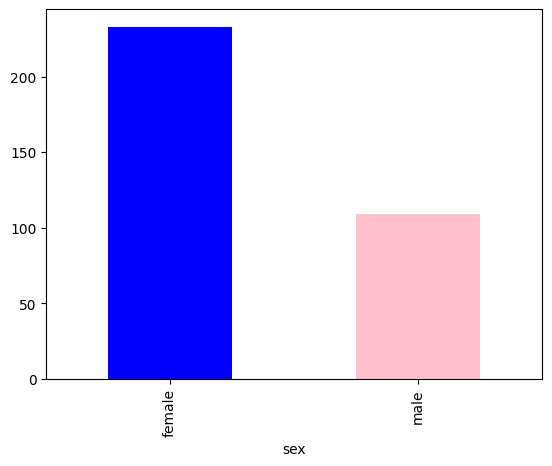

In [19]:
survived_sex.plot(kind='bar', color=['blue', 'pink'])
plt.title('Survivors by Sex')
plt.ylabel('Number of Survivors')
plt.xlabel('Sex')
plt.xticks(rotation=0)
plt.show()

In [20]:
## Calcular o número total de sobreviventes

In [21]:
total_survivors = df['survived'].sum()
print("Total number of survivors:", total_survivors)

Total number of survivors: 342


In [22]:
## Calcular o número total de mulheres

In [23]:
total_women = df[df['sex'] == 'female'].shape[0]
print("Total number of women:", total_women)

Total number of women: 314


In [24]:
## Calcular o número total de mulheres que sobreviveram

In [25]:
total_survived_women = df[(df['sex'] == 'female') & (df['survived'] == 1)].shape[0]
print("Total number of survived women:", total_survived_women)

Total number of survived women: 233


In [26]:
## Calcular o número total de crianças

In [27]:
total_children = df[df['who'] == 'child'].shape[0]
print("Total number of children:", total_children)

Total number of children: 83


In [28]:
## Calcular o número total de crianças que sobreviveram

In [29]:
total_survived_children = df[(df['who'] == 'child') & (df['survived'] == 1)].shape[0]
print("Total number of survived children:", total_survived_children)

Total number of survived children: 49


In [30]:
## Contar o número de pessoas em cada classe

In [31]:
people_per_class = df.groupby('class').size()
print("Number of people per class:")
print(people_per_class)

Number of people per class:
class
First     216
Second    184
Third     491
dtype: int64


In [32]:
## Calcular o número de sobreviventes por classe

In [33]:
survivors_per_class = df.groupby('class')['survived'].sum()
print("Number of survivors per class:")
print(survivors_per_class)

Number of survivors per class:
class
First     136
Second     87
Third     119
Name: survived, dtype: int64


In [37]:
import matplotlib.pyplot as plt

In [38]:
survivors_grouped = df.groupby(['class', 'sex', pd.cut(df['age'], bins=[0, 18, 50, 100])])['survived'].sum().reset_index()

<Figure size 1200x800 with 0 Axes>

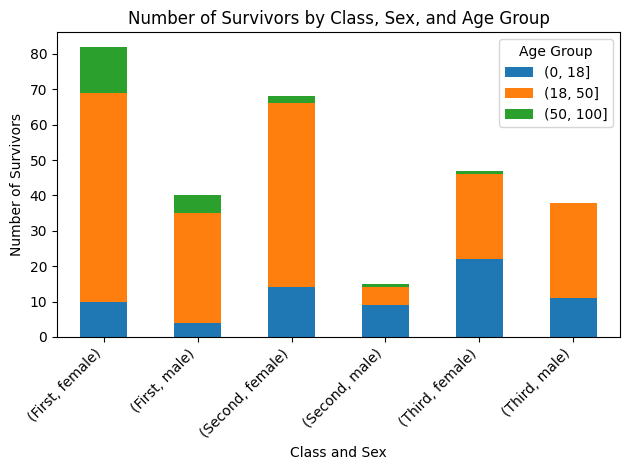

In [39]:
plt.figure(figsize=(12, 8))
survivors_grouped.pivot_table(index=['class', 'sex'], columns='age', values='survived').plot(kind='bar', stacked=True)
plt.title('Number of Survivors by Class, Sex, and Age Group')
plt.ylabel('Number of Survivors')
plt.xlabel('Class and Sex')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()